# Fast Frourier transform test
## 110Hz

110 Hz (A2) corresponds to two octaves below the stnadard of 440Hz (A4).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import soundfile
import sounddevice

In [2]:
def generate_sample(frequency, sample_rate, n_sample):
    """
    frequency: Hz
    sample_rate: sample spacing
    n_sample: number of samples returned
    """
    x = np.linspace(0, sample_rate * n_sample, n_sample)
    y = np.sin(frequency * 2 * np.pi * x)
    return x, y

In [3]:
frequency = 110
sample_rate = 1 / 500
n_sample = 1000
x, y = generate_sample(frequency, sample_rate, n_sample)

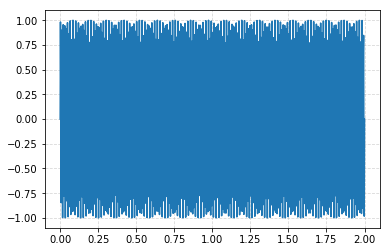

In [4]:
plt.plot(x, y);

`fft` returns

$$
a_k = a_{k+N} = \sum_{n=<N>} x \left[ n \right] e^{-jk\Omega n}; \Omega = \frac{2 \pi}{N}
$$

cf) http://scipy.github.io/devdocs/tutorial/fftpack.html

In [5]:
yf = fft(y)

In [6]:
len(yf)

1000

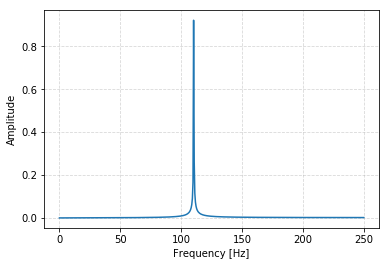

In [7]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 0.5 / sample_rate, n_sample//2),
        2.0 / n_sample * np.abs(yf[0:n_sample//2]))
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency [Hz]');

## Beep sound


The sample beep sound is downloaded from https://www.soundjay.com/beep-sounds-1.html (Beep 1)

### Load a wav file

In [8]:
wav, wav_sample_rate = soundfile.read('beep-01a.wav')

In [9]:
print(wav)
print(len(wav))
print(wav_sample_rate)  # 44.1 kHz

[  3.05175781e-05   6.24389648e-02   1.25061035e-01 ...,  -1.22070312e-04
   1.52587891e-04  -1.83105469e-04]
31542
44100


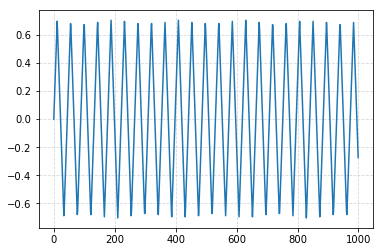

In [10]:
plt.plot(wav[:1000]);

### Apply FFT to the wav file

This signal can be expressed in the frequency domain. After applying FFT, one can see that the beep sound is mainly composed of multiple harmonics and other noises with small amplitudes.

In [11]:
wav_fft = fft(wav)

In [12]:
wav_fft_result = pd.Series(
    2.0 / len(wav) * np.abs(wav_fft[0:len(wav)//2]),
    index=np.linspace(0, 0.5 * wav_sample_rate, len(wav)//2),
    name='amplitude'
)

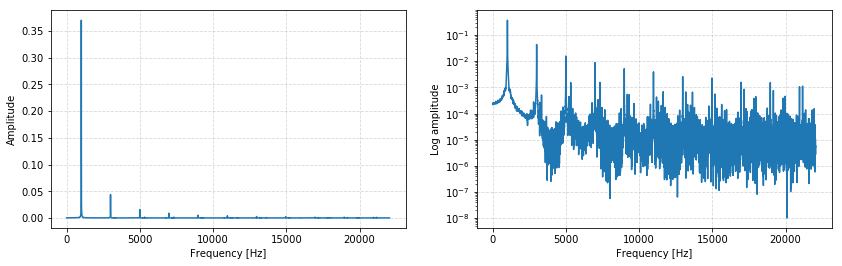

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

wav_fft_result.plot(ax=ax[0])
wav_fft_result.plot(logy=True, ax=ax[1])

ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Log amplitude')
ax[0].set_xlabel('Frequency [Hz]')
ax[1].set_xlabel('Frequency [Hz]');

It looks the first harmonic is 1000 Hz.

In [14]:
wav_fft_result.sort_values(ascending=False).head(10)

996.934052     0.370180
998.332276     0.352682
995.535828     0.119647
999.730501     0.117822
994.137603     0.072112
1001.128725    0.071489
992.739379     0.051728
1002.526950    0.051473
2992.200380    0.043714
991.341154     0.039552
Name: amplitude, dtype: float64

### Reproduce the beep with a sinusoid

In [15]:
frequency = 1000
sample_rate = 1 / wav_sample_rate
n_sample = len(wav)
wav_x, wav_y = generate_sample(frequency, sample_rate, n_sample)

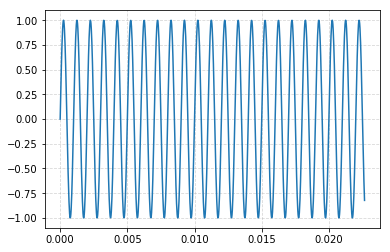

In [16]:
plt.plot(wav_x[:1000], wav_y[:1000]);

This should sound like the original beep sound without higher harmonics. Also this sinusoid should be a bit louder since the amplitude is larger.

In [17]:
sounddevice.play(wav_y, wav_sample_rate)